In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# path of data 
path = r"C:\Users\Victor_Lazari\Desktop\Automobile-Data-Set\After_Data_Wrangling.csv"

# store in dataframe df:
df = pd.read_csv(path)
df.head()

,index,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495,11.190476,8.703704,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500,11.190476,8.703704,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950,9.791667,7.833333,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450,13.055556,10.681818,Medium,0,1,1,0


## Linear Regression for "highway-mpg"
The equation: Yhat=a+bX

In [2]:
# load the modules for linear regression
from sklearn.linear_model import LinearRegression

#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
# create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
X = df[["highway-mpg"]]
Y = df["price"]

#Fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [5]:
# intercept:
lm.intercept_

38423.3058581574

In [6]:
# slope:
lm.coef_

array([-821.73337832])

The equation is:

price = 38423.31 - 821.73 x highway-mpg

## Linear Regression for "engine-size"

In [7]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# create a linear function with "engine-size" as the predictor variable and the "price" as the response variable.
X1 = df[["engine-size"]]
Y1 = df["price"]

#Fit the linear model using "engine-size".
lm1.fit(X1, Y1)

#output a prediction
Yhat = lm1.predict(X1)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [9]:
# intercept:
lm1.intercept_

-7963.338906281049

In [10]:
# slope:
lm1.coef_

array([166.86001569])

The equation is:

price = -7963.34 + 166.86 x engine-size

## Multiple Linear Regression "horsepower", "curb-weight", "engine-size", "highway-mpg"
The equation:
            Yhat=a+b1X1+b2X2+b3X3+b4X4

good predictors of price could be:

                Horsepower
                Curb-weight
                Engine-size
                Highway-mpg

In [28]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm.fit(Z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# find the intercept
lm.intercept_

-15806.624627057405

In [13]:
# find coefficients()
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748883])

The equation is:

price = -15806.62 + 53.5xhorsepower + 4.71xcurb-weight + 81.53 x engine-size + 36.06 x highway-mpg

## Multiple Linear Regression for 'normalized-losses', 'highway-mpg'

In [34]:
lm2 = LinearRegression()
Z1 = df[["normalized-losses", "highway-mpg"]]
lm2.fit(Z1, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Find intercept
lm2.intercept_

38201.313272457264

In [36]:
# find coefficient
lm2.coef_

array([   1.49789586, -820.45434016])

The equation id :
price = 38201.31 + 1.5 x normalized-losses -820.45 x highway-mpg

## Model Evaluation using Visualization

In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

#### Regression Plot

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48280.26966415052)

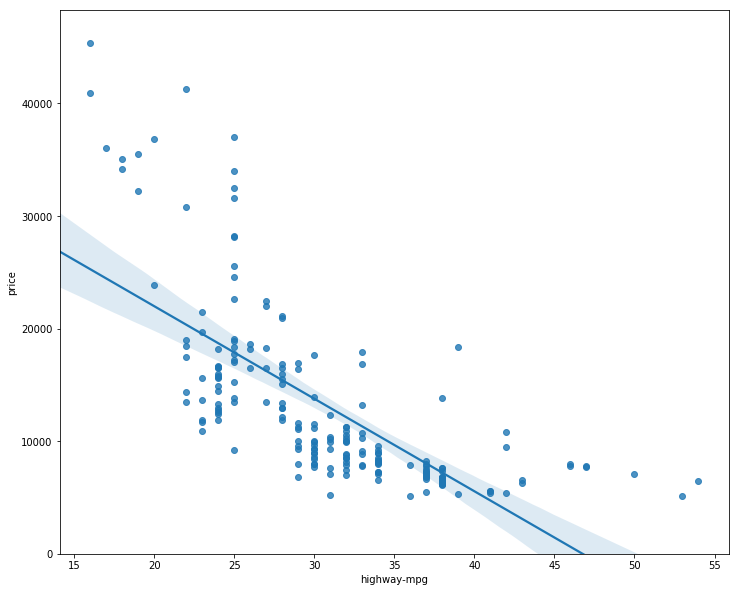

In [18]:
# visualize Horsepower as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)

Price is negatively correlated to highway-mpg, the regression slope is negative, I will compare this plot to the regression plot of "peak-rpm".

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 47436.148325769056)

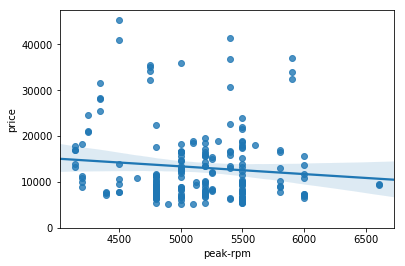

In [19]:
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

"peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing

In [20]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [21]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### "highway-mpg" more strongly correlated with "price" approximately (- 0.705)

In [24]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

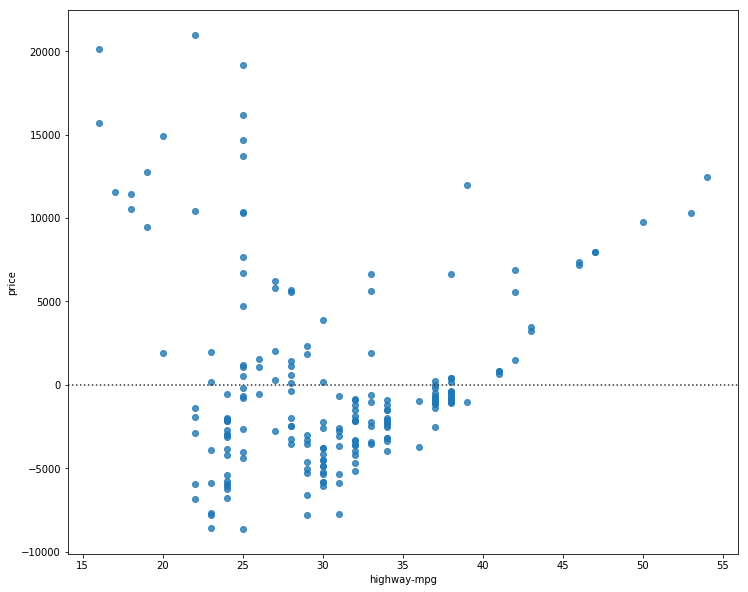

In [25]:
plt.figure(figsize = (width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

 From this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

In [32]:
Y_hat = lm.predict(Z)

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


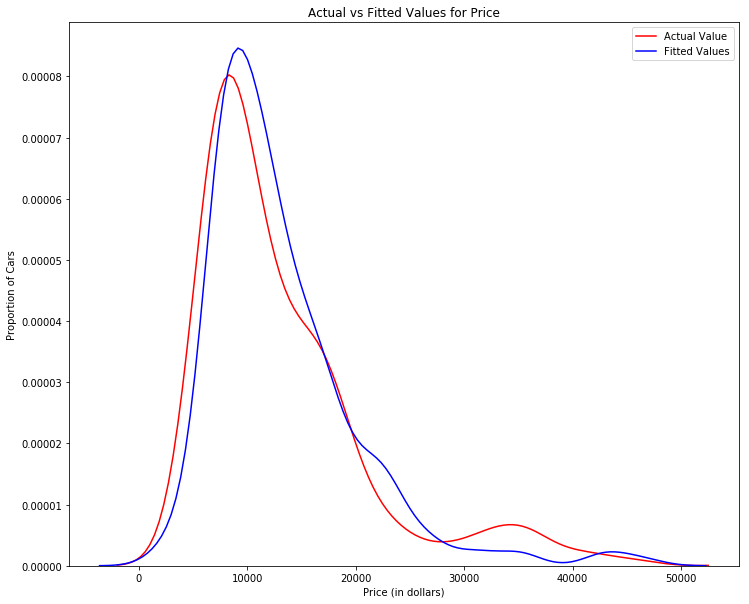

In [38]:
# parameter width is 12
width = 12

# parameter height is 10
height = 10

# insert the parameters of width and height in "figsize"
plt.figure(figsize = (width,height))

# assign first graph "ax1" which is True Value of "price"  with ploting options of saying that is not histogram , 
# color is red and graph label is  "Actual Value"
ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")

# Ploting the second graph that is prediction of "price" function, which is not histogram, color blue, graph label "Fitted Values"
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Values", ax = ax1)

# Title
plt.title("Actual vs Fitted Values for Price")

# X label
plt.xlabel("Price (in dollars)")

# Y label
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

I will try plotting a **Polynomial Regression** which is usefull for nonlinear relationships by squaring or setting higher-order terms of the predictor variables.

Orders of polynomial regression:

            **Quadratic - 2nd order**
            Yhat=a + b1X^2 + b2X^2
            **Cubic - 3rd order**
            Yhat=a + b1X^2 + b2X^2 + b3X^3
            **Higher order**:
            Y=a + b1^X2 + b2X^2 + b3X^3....


In [59]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    """Define a function for plotting a Polynomial Regression model"""
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [87]:
# Assign variables to x and y
x = df["highway-mpg"]
y = df["price"]

In [88]:
# Polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


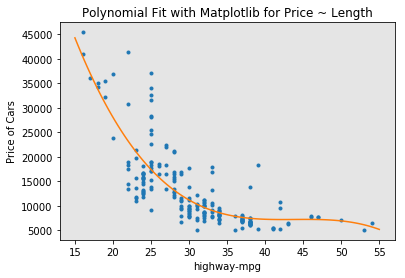

In [89]:
# Plotting the function PlotPolly()
PlotPolly(p, x, y, "highway-mpg")

In [90]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

 This polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [91]:
# Creating a 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


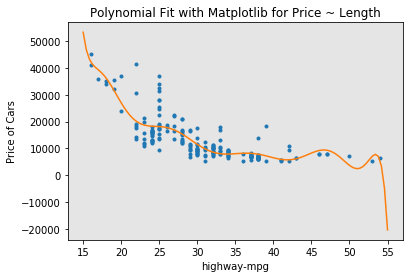

In [92]:
PlotPolly(p1, x, y, "highway-mpg")

## Moving to  Multivariate Polynomial
Example of expression for a second-order (degree=2)polynomial with two variables is given by:
     
     Yhat = a + (b1)(X1) + (b2)(X2) + (b3)(X1)(X2) + (b4)(X1)^2 + (b5)(X2)^2


In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
# create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [96]:
Z_pr = pr.fit_transform(Z)

In [97]:
# The original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [98]:
# after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

Moving to **Data Pipelines** which simplify the steps of processing the data. Use the module Pipeline to create a pipeline.

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [100]:
# create the pipeline, by creating a list of tuples including the 
# name of the model or estimator and its corresponding constructor.
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

In [101]:
# input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [102]:
# normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [103]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784203, 13102.74784203, 18225.54572209, 10390.29636566])

In [109]:
# pipeline that Standardizes the data, then perform prediction using a 
# linear regression model using the features Z and targets y
Input = [("scale", StandardScaler()), ("model", LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [110]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [111]:
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470248, 10620.36193018,
       15521.31420205, 13869.66673208, 15456.16196728, 15974.00907669,
       17612.35917167, 10722.32509099])

### Apply Measures for In-Sample Evaluation
To determine the accuracy of a model are:

                    R^2 / R-squared 
                    Mean Squared Error (MSE)

In [115]:
# Simple Linear Regression  R^2
# highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
lm.score(X, Y)

0.4965911884339176

~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [116]:
# predict the output "yhat" using the predict method, where X is the input variable:
Yhat = lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [118]:
# import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [119]:
# mean_squared_error(Y_true, Y_predict)
mean_squared_error(df["price"], Yhat)

31635042.944639888

### Multiple Linear Regression calculate the R^2

In [120]:
# fit the model
lm.fit(Z, df["price"])

# find the R^2
lm.score(Z, df["price"])

0.8093562806600989

~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

calculate the MSE

In [121]:
Y_predict_multifit = lm.predict(Z)

In [122]:
#compare the predicted results with the actual results
mean_squared_error(df["price"], Y_predict_multifit)

11980366.87057861

In [124]:
# import the function r2_score from the module ** metrics** as we are using a different function
from sklearn.metrics import r2_score

In [125]:
# apply the function to get the value of R^2
r_squared = r2_score(y,p(x))
r_squared


0.6741946663906522

~ 67.419 % of the variation of price is explained by this polynomial fit

In [126]:
# calculate the MSE:
mean_squared_error(df["price"],p(x))

20474146.426361203

Train the model using the method fit. Will use the method predict to produce a **prediction**. Import pyplot for plotting; Will also use some functions from numpy.

In [127]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [128]:
# new input
new_input = np.arange(1,100,1).reshape(-1,1)

In [129]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
# Produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

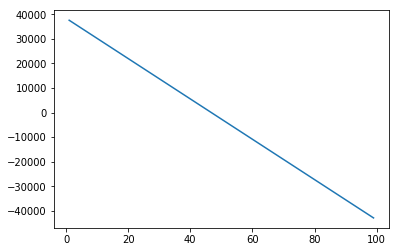

In [131]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

### Determining a Good Model Fit
I have visualized the different models, and generated the R^2 and MSE values for the fits, the model with the higher **R^2** and with the smallest **MSE** value is a better fit for the data.

The values for the different models:

    Simple Linear Regression(SLR): Using Highway-mpg as a Predictor Variable of Price.

            R^2: 0.49659118843391759
            MSE: 3.16 x10^7
    
    Multiple Linear Regression(MLR): Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

            R^2: 0.80896354913783497
            MSE: 1.2 x10^7
    
    Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

            R^2: 0.6741946663906514
            MSE: 2.05 x 10^7
With 27 variables in total, and more than one of those variables are potential predictors of the final car price the Multiple Linear Regression(MLR) has the best results.